[@LorenaABarba](https://twitter.com/LorenaABarba)

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

***12 étapes vers Navier–Stokes***
======
***

Vous devez avoir terminé les étapes [1](./01_Step_1.ipynb) et [2](./02_Step_2.ipynb) avant de continuer. Ce cahier Jupyter poursuit la présentation des **12 étapes de Navier–Stokes**, le module pratique enseigné dans la classe interactive CFD de [Prof. Lorena Barba] ​​(http://lorenabarba.com).



Étape 3 : Équation de diffusion en 1-D
-----
***

L'équation de diffusion unidimensionnelle est :

$$\frac{\partial u}{\partial t}= \nu \frac{\partial^2 u}{\partial x^2}$$

La première chose que vous devriez remarquer est que, contrairement aux deux équations simples précédentes que nous avons étudiées, cette équation a une dérivée du second ordre. Nous devons d'abord savoir quoi en faire !



### Discrétiser $\frac{\partial ^2 u}{\partial x^2}$



La dérivée du second ordre peut être représentée géométriquement comme la ligne tangente à la courbe donnée par la dérivée première. Nous allons discrétiser la dérivée du second ordre avec un schéma de différence centrale : une combinaison de différence avant et de différence arrière de la dérivée première. Considérez le développement de Taylor de $u_{i+1}$ et $u_{i-1}$ autour de $u_i$ :

$u_{i+1} = u_i + \Delta x \frac{\partial u}{\partial x}\bigg|_i + \frac{\Delta x^2}{2} \frac{\partial ^2 u }{\partial x^2}\bigg|_i + \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\bigg|_i + O(\ Delta x^4)$

$u_{i-1} = u_i - \Delta x \frac{\partial u}{\partial x}\bigg|_i + \frac{\Delta x^2}{2} \frac{\partial ^2 u }{\partial x^2}\bigg|_i - \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\bigg|_i + O(\ Delta x^4)$

Si nous additionnons ces deux développements, vous pouvez voir que les termes dérivés impairs s'annuleront. Si nous négligeons tous les termes de $O(\Delta x^4)$ ou plus (et vraiment, ceux-ci sont très petits), alors nous pouvons réorganiser la somme de ces deux expansions pour résoudre notre dérivée seconde.


$u_{i+1} + u_{i-1} = 2u_i+\Delta x^2 \frac{\partial ^2 u}{\partial x^2}\bigg|_i + O(\Delta x^4) $

Ensuite, réorganisez pour résoudre $\frac{\partial ^2 u}{\partial x^2}\bigg|_i$ et le résultat est :

$$\frac{\partial ^2 u}{\partial x^2}=\frac{u_{i+1}-2u_{i}+u_{i-1}}{\Delta x^2} + O (\Delta x^2)$$



### Retour à l'étape 3



On peut maintenant écrire la version discrétisée de l'équation de diffusion en 1D :

$$\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=\nu\frac{u_{i+1}^{n}-2u_{i }^{n}+u_{i-1}^{n}}{\Delta x^2}$$

Comme précédemment, nous remarquons qu'une fois que nous avons une condition initiale, la seule inconnue est $u_{i}^{n+1}$, nous réorganisons donc l'équation en résolvant notre inconnue :

$$u_{i}^{n+1}=u_{i}^{n}+\frac{\nu\Delta t}{\Delta x^2}(u_{i+1}^{n}- 2u_{i}^{n}+u_{i-1}^{n})$$

L'équation discrète ci-dessus nous permet d'écrire un programme pour avancer une solution dans le temps. Mais nous avons besoin d'une condition initiale. Continuons à utiliser notre préférée : la fonction chapeau. Ainsi, à $t=0$, $u=2$ dans l'intervalle $0.5\le x\le 1$ et $u=1$ partout ailleurs. Nous sommes prêts à faire des calculs !

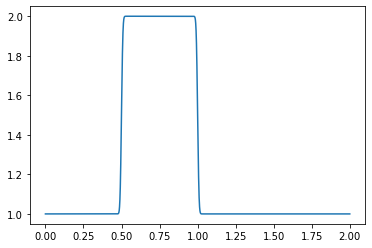

In [2]:
import numpy                 #loading our favorite library
from matplotlib import pyplot    #and the useful plotting library
%matplotlib inline

nx = 4001
dx = 2 / (nx - 1)
nt = 500    #the number of timesteps we want to calculate
nu = 0.3   #the value of viscosity
sigma = .2 #sigma is a parameter, we'll learn more about it later
dt = sigma * dx**2 / nu #dt is defined using sigma ... more later!


u = numpy.ones(nx)      #a numpy array with nx elements all equal to 1.
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s

un = numpy.ones(nx) #our placeholder array, un, to advance the solution in time

for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx - 1):
        u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])
        
pyplot.plot(numpy.linspace(0, 2, nx), u);

## Learn More

For a careful walk-through of the discretization of the diffusion equation with finite differences (and all steps from 1 to 4), watch **Video Lesson 4** by Prof. Barba on YouTube.

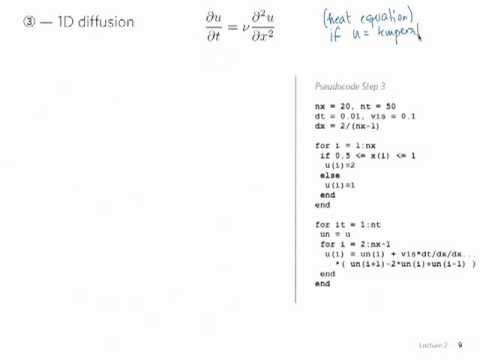

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('y2WaK7_iMRI')

In [4]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

> (La cellule ci-dessus exécute le style de ce bloc-notes.)